Check out the Swiss Cheese rolling cadence

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plotters

In [4]:
runList = ['enigma_1189','ops2_1102', 'enigma_1260', 'enigma_1261']
runDict = {'enigma_1189':'Baseline','ops2_1102':'Cheese1', 'enigma_1260':'Cheese2', 'enigma_1261':'Cheese_no_restart'}
dbDir = '/Users/yoachim/Scratch/Opsim_sqlites/'
outDir = 'CheeseTest'
resultsDb = db.ResultsDb(outDir=outDir)
plotList = [plotters.HealpixSkyMap(), plotters.HealpixHistogram()]
summaryMetrics=[metrics.MedianMetric()]

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 544710 visits
Running:  ['opsim_Median_Inter-Night_Gap_Baselinedithered_HEAL', 'opsim_Median_Intra-Night_Gap_Baselinedithered_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.

Optimal bin calculation tried to make 16926 bins, returning 200
Optimal bin calculation tried to make 2463 bins, returning 200



Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 504638 visits
Running:  ['opsim_Median_Intra-Night_Gap_Cheese1dithered_HEAL', 'opsim_Median_Inter-Night_Gap_Cheese1dithered_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 612 bins, returning 200
Optimal bin calculation tried to make 18512 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 469113 visits
Running:  ['opsim_Median_Intra-Night_Gap_Cheese2dithered_HEAL', 'opsim_Median_Inter-Night_Gap_Cheese2dithered_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 1321 bins, returning 200
Optimal bin calculation tried to make 10654 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes
Querying database with constraint filter="r"
Found 437418 visits
Running:  ['opsim_Median_Inter-Night_Gap_Cheese_no_restartdithered_HEAL', 'opsim_Median_Intra-Night_Gap_Cheese_no_restartdithered_HEAL']
Completed metric generation.

Optimal bin calculation tried to make 13324 bins, returning 200
Optimal bin calculation tried to make 2144 bins, returning 200



Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


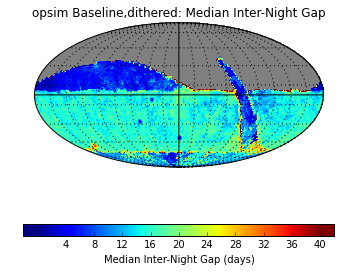

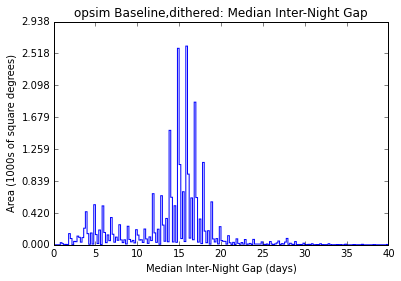

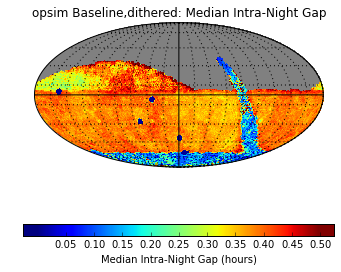

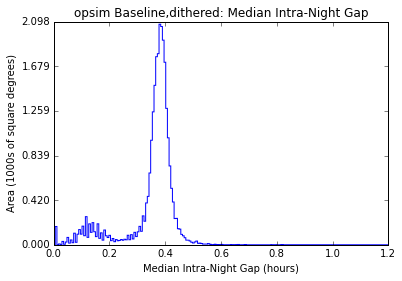

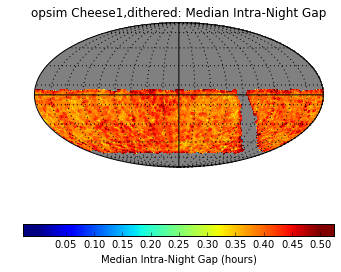

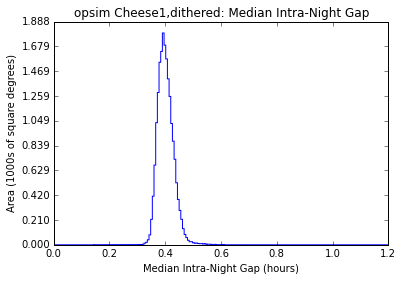

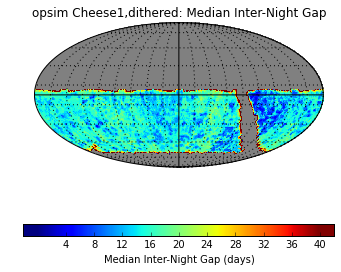

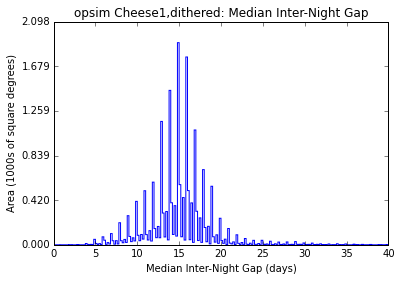

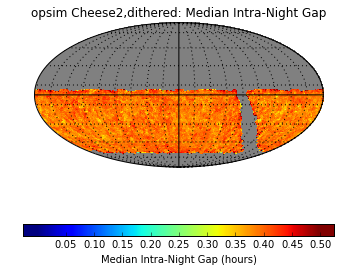

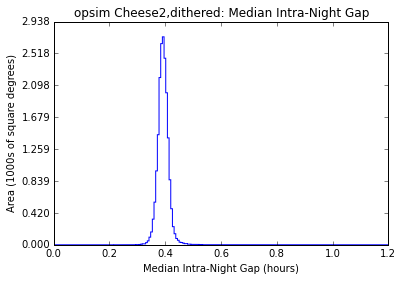

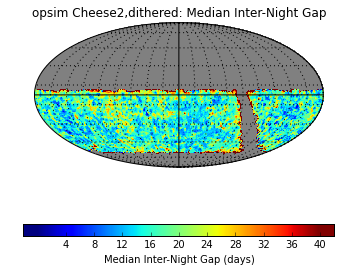

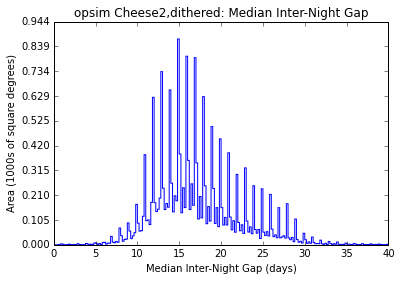

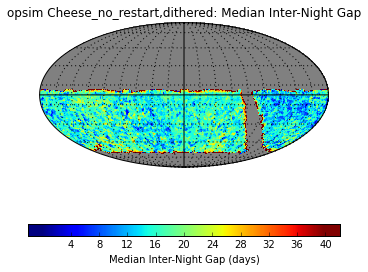

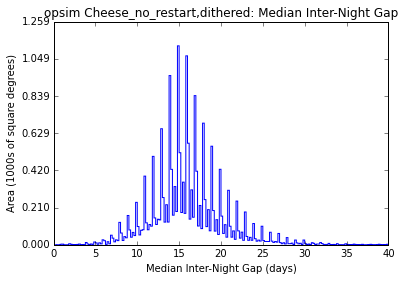

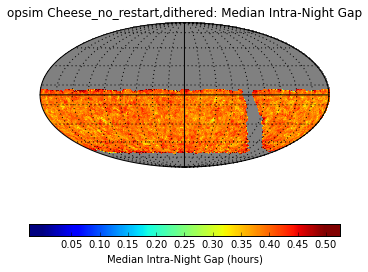

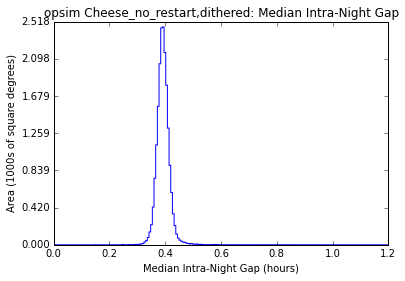

In [7]:
BLinter=[]
BLintra = []
for runName in runList:
    # Set up the database connection
    opsdb = db.OpsimDatabase(dbDir+runName+'_sqlite.db')
    md = runDict[runName]
    metric = metrics.IntraNightGapsMetric()
    metric2 = metrics.InterNightGapsMetric()
    plotDict = {'cmap':'jet', 'colorMin':0,'colorMax':0.5, 'xMin':0,'xMax':1.2}
    plotDict2 = {'cmap':'jet', 'colorMin':0,'colorMax':40, 'xMin':0,'xMax':40}
    sql = 'filter="r"'
    bundleList = []
    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec')
    bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    BLintra.append(bundle)
    bundle = metricBundles.MetricBundle(metric2,slicer,sql, plotDict=plotDict2, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    BLinter.append(bundle)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [10]:
print 'run,  median gap'
for bundle in BLinter:
    print bundle.metadata, bundle.summaryValues['Median']

run,  median gap
Baseline,dithered 14.984695
Cheese1,dithered 14.970151
Cheese2,dithered 16.741628
Cheese_no_restart,dithered 15.875869


In [11]:
print 'run,  median gap'
for bundle in BLintra:
    print bundle.metadata, bundle.summaryValues['Median']

run,  median gap
Baseline,dithered 0.377232000057
Cheese1,dithered 0.399167999931
Cheese2,dithered 0.392279999956
Cheese_no_restart,dithered 0.391704000067


Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database with constraint filter="g" or filter="r" or filter="i"
Found 1339306 visits
Running:  ['opsim_TransientDetectMetric_Baseline_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="g" or filter="r" or filter="i" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database with constraint filter="g" or filter="r" or filter="i"
Found 1245242 visits
Running:  ['opsim_TransientDetectMetric_Cheese1_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with filter="g" or filter="r" or filter="i" sqlconstraint now.
Plotting complete.
Healpix slicer using NSIDE=8, approximate resolution 439.742261 arcminutes
Querying database with constraint filter="g" or filter="r" or filter="i"
Found 1157253 visits


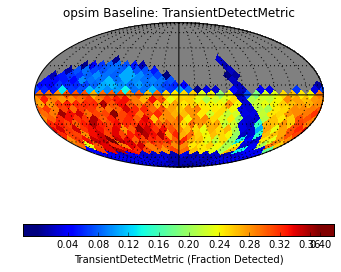

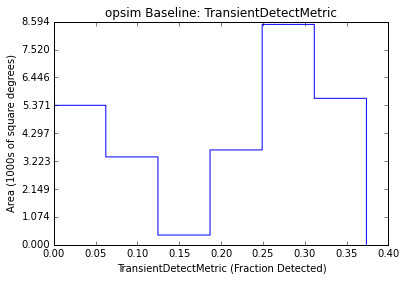

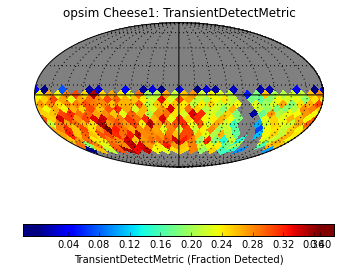

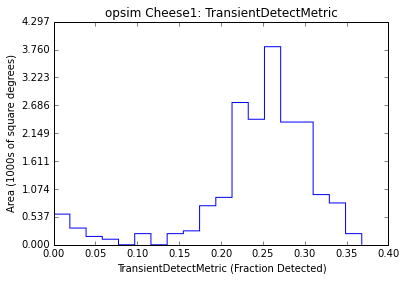

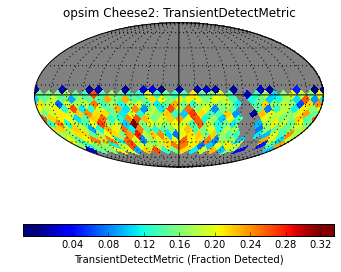

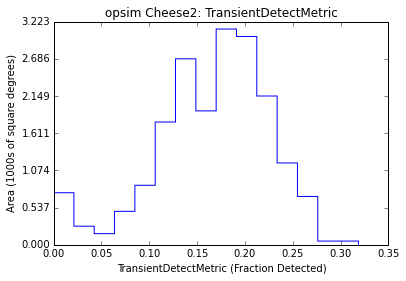

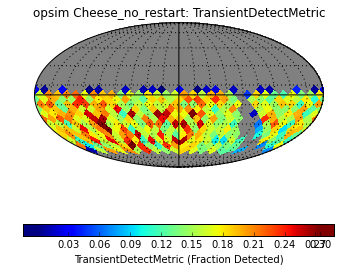

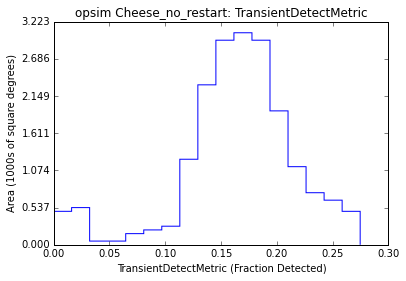

In [15]:
# Try out demanding to observations in g,r,or i
peaks = {'uPeak':35, 'gPeak':20, 'rPeak':20, 'iPeak':20, 'zPeak':35, 'yPeak':35}
sql = 'filter="g" or filter="r" or filter="i"'
allBundles = []
for runName in runList:
    # Set up the database connection
    opsdb = db.OpsimDatabase(dbDir+runName+'_sqlite.db')
    md = runDict[runName]
    metric = metrics.TransientMetric(transDuration=20., peakTime=10., nPrePeak=2, nFilters=2, 
                                     **peaks)
    bundleList = []
    plotDict = {'cmap':'jet'}
    slicer=slicers.HealpixSlicer(lonCol='ditheredRA', latCol='ditheredDec', nside=8)
    
    bundle = metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, 
                                        metadata=md, plotFuncs=plotList,
                                        summaryMetrics=summaryMetrics)
    bundleList.append(bundle)
    allBundles.append(bundle)
    bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
    bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
    bgroup.runAll()
    bgroup.plotAll(closefigs=False)

In [16]:
print 'run,  median fraction'
for bundle in allBundles:
    print bundle.metadata, bundle.summaryValues['Median']

run,  median fraction
Baseline 0.252747252747
Cheese1 0.258241758242
Cheese2 0.17032967033
Cheese_no_restart 0.17032967033
